<a href="https://colab.research.google.com/github/muthu-2005/Dummy/blob/main/Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

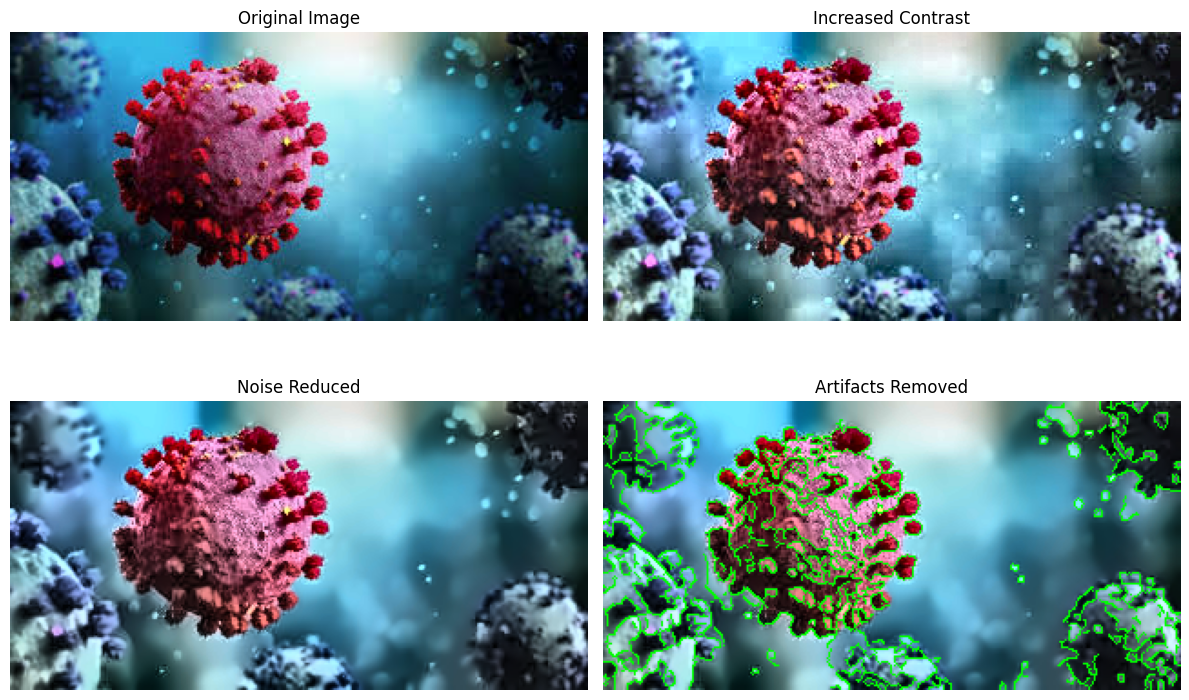

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def increase_contrast(image):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    # Merge the CLAHE enhanced L-channel back with A and B channels
    limg = cv2.merge((cl, a, b))
    enhanced_image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    return enhanced_image

def reduce_noise(image):
    # Use fastNlMeansDenoisingColored for colored images
    denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    return denoised_image

def remove_artifacts(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to smooth the image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours
    artifact_removed_image = image.copy()
    cv2.drawContours(artifact_removed_image, contours, -1, (0, 255, 0), 1)

    return artifact_removed_image

def plot_images(original, contrast, noise_reduced, artifact_removed):
    # Display the images
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image'), plt.axis('off')

    plt.subplot(2, 2, 2), plt.imshow(cv2.cvtColor(contrast, cv2.COLOR_BGR2RGB))
    plt.title('Increased Contrast'), plt.axis('off')

    plt.subplot(2, 2, 3), plt.imshow(cv2.cvtColor(noise_reduced, cv2.COLOR_BGR2RGB))
    plt.title('Noise Reduced'), plt.axis('off')

    plt.subplot(2, 2, 4), plt.imshow(cv2.cvtColor(artifact_removed, cv2.COLOR_BGR2RGB))
    plt.title('Artifacts Removed'), plt.axis('off')

    plt.tight_layout()
    plt.show()

def main(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Perform enhancements
    contrast_image = increase_contrast(image)
    noise_reduced_image = reduce_noise(contrast_image)
    artifact_removed_image = remove_artifacts(noise_reduced_image)

    # Plot the results
    plot_images(image, contrast_image, noise_reduced_image, artifact_removed_image)

if __name__ == "__main__":
    # Provide the path to your image
    image_path = '/content/download (1).jpeg'
    main(image_path)
